In [1]:
import torch
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import torchvision

In [2]:
os.chdir('..')
from src import data,model,loss,utils

### 1. Visaulize Dataset

In [3]:
data_path = os.path.join('data/train.csv')
data_df = pd.read_csv(data_path)

In [4]:
img_list = []
age_list = []
for i,d in data_df.iterrows():
    img = plt.imread(os.path.join(f'data/utk_sample/{d["file_name"]}'))
    age = d["age"]
    img_list.append(img)
    age_list.append(age)

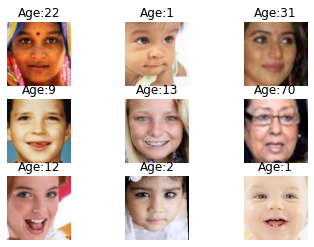

In [5]:
f, axarr = plt.subplots(3,3)
[axi.set_axis_off() for axi in axarr.ravel()]
for i in range(3):
    for j in range(3):
        axarr[i,j].imshow(img_list[i*3+j])
        axarr[i,j].set_title(f"Age:{age_list[i*3+j]}")

## 2. Visualize Predicitons and Probabilities

In [6]:
path_to_train = os.path.join('data/train.csv')
dataset_train = data.Face(path_to_train,mode="train",aug = False)

In [7]:
age_estimator = model.AgeEstimation(dropout=0.5)

/home/sanket/anaconda3/envs/age-estimation/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/sanket/anaconda3/envs/age-estimation/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [8]:
ckpt_dir = 'models/age-estimation-KL/07_31_2022_16_41/checkpoints/best_model.ckpt'
ckpt = utils.load_checkpoint(ckpt_dir_or_file=ckpt_dir,load_best=True,cp_path="")

 [*] Loading checkpoint from models/age-estimation-KL/07_31_2022_16_41/checkpoints/best_model.ckpt succeed!


In [9]:
age_estimator.load_state_dict(ckpt['net'])

<All keys matched successfully>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 223.5, 223.5, -0.5)

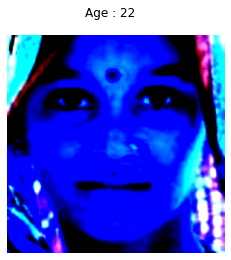

In [30]:
image,age = dataset_train[0]
np_img = data.to_np(image)
plt.imshow(np_img)
plt.suptitle(f"Age : {int(age.numpy())+1}")
plt.axis("off")

### Please note that this is the normalized image, thus the colors seem different that original.

In [31]:
with torch.no_grad():
    log_predicted_distribution = age_estimator(dataset_train[0][0].unsqueeze(0),mode='eval')

In [32]:
predicted_dist = torch.exp(log_predicted_distribution)

Text(0, 0.5, 'Probability')

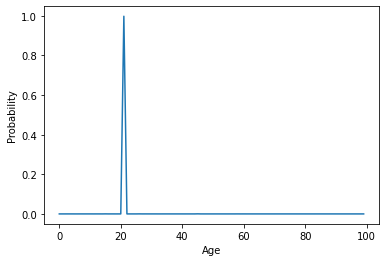

In [34]:
plt.plot(np.arange(100),predicted_dist.numpy().flatten())
plt.xlabel("Age")
plt.ylabel("Probability")

#### As seen above, the predicted distribution has a peak at 21 ( which is in fact representation of age 22 since the labels start from 0 to 100 ). Thus the model was able to learn and predict the correct age, given the face.